In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import matplotlib.image as mpimg
from mayavi import mlab
mlab.init_notebook('x3d')
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
rc('font', size=14)

Notebook initialized with x3d backend.


# Static test

## Objective

5 methods are used to compare with each other:


| method       | Gradient   | Flood    | Iteration      |
|--------------|------------|----------|----------------|
| ZY           | numerical  | fast     |  Gauss-Newton  |
| LemoineGN    | analytic   | none     |  Gauss-Newton  |
| LemoineBFGS  | analytic   | none     |  BFGS          |
| LemoineGeo   | numerical  | geometry |  BFGS          |
| Sussman      | numerical  | geometry |  Gauss-Newton  |

Lemoine's analytic gradient is fast, can be 200 faster than the numerical gradient from geometry algorithm.
We propose a fast flood algorithm, even though uses a numerical gradient, the computational time is compatable with lemoine's analytic gradient while keep rubustness.

Focus on:

- effeciency
- accuracy
- robustness

## Case setup
Randomly genetate 1000000 sets of normal vector and volume fraction
$$ n_x,n_y,n_z,f $$
and calculate the corresponding centroid
$$ c_x,c_y,c_z,f $$

### case1: uniform cases

all variables are uniform distribution

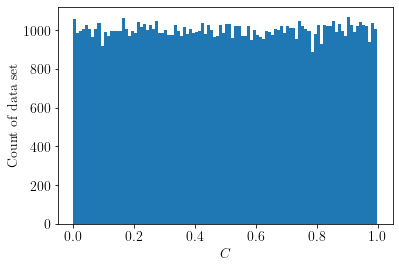

In [16]:
num_sampling = 100000
num_sampling2 = int(num_sampling / 2)
num_sampling4 = int(num_sampling / 4)
f = np.random.random(size=num_sampling) 
m=plt.hist(f,bins=100)
plt.xlabel('$C$')
plt.ylabel('Count of data set')
plt.savefig('figs/dataset1.pdf',dpi=150, bbox_inches='tight')

### case2: exponential cases
We focus on volume fraction is close to 0, 1/2 and 1, which correspond with extreme cases.
The distribution of f are combination of one full normal distribution and two semi parts of normal distributions.
the normal vectors are generated with uniform distribution.

This figure shows the the distribution of volume fraction.


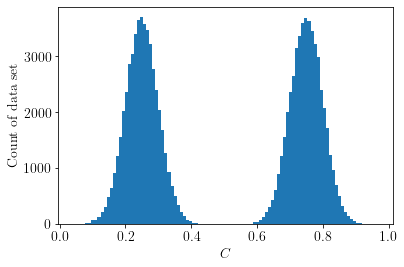

In [17]:
num_sampling = 100000
num_sampling2 = int(num_sampling / 2)
num_sampling4 = int(num_sampling / 4)
f = np.random.normal(loc=0.0, scale=0.1, size=num_sampling2) 
f1 = (f+ 0.5) / 2
f = np.random.normal(loc=0.0, scale=0.1, size=num_sampling2) 
f2 = (f + 0.5) / 2+ 0.5
f=np.concatenate([f1,f2])
x = np.arange(0,1,0.1)
m=plt.hist(f,bins=100)
plt.xlabel('$C$')
plt.ylabel('Count of data set')
plt.savefig('figs/dataset2.pdf',dpi=150, bbox_inches='tight')

### case3: extreme cases
We focus on volume fraction is close to 0, 1/2 and 1, which correspond with extreme cases.
The distribution of f are combination of one full normal distribution and two semi parts of normal distributions.
the normal vectors are generated with uniform distribution.

This figure shows the the distribution of volume fraction.

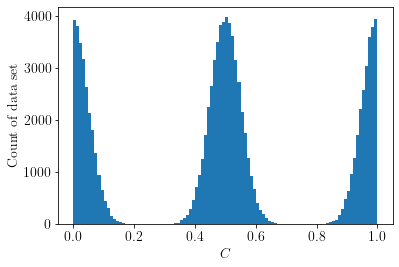

In [18]:
num_sampling = 100000
num_sampling2 = int(num_sampling / 2)
num_sampling4 = int(num_sampling / 4)
f = np.random.normal(loc=0.0, scale=0.1, size=num_sampling2) 
f3 = 0.5-f[f>0]
f4 = -0.5-f[f<=0]
f1 = (np.concatenate([f3,f4]) + 0.5) / 2
f = np.random.normal(loc=0.0, scale=0.1, size=num_sampling2) 
f3 = 0.5-f[f>0]
f4 = -0.5-f[f<=0]
f2 = (np.concatenate([f3,f4]) + 0.5) / 2+ 0.5
f=np.concatenate([f1,f2])
x = np.arange(0,1,0.1)
m=plt.hist(f,bins=100)
plt.xlabel('$C$')
plt.ylabel('Count of data set')
plt.savefig('figs/dataset3.pdf',dpi=150, bbox_inches='tight')

## Results

### case1: uniform cases

# Translation test

The initial setup is

| Parameter  | value                         | 
|------------|-------------------------------|
| domain     | [0,1] $\times$ [0,1]          | 
| grids      | 100 $\times$ 100 $\times$ 50       |
| $h$        | 0.01                                |
| shape      | D = 0.4, d = 0.2                    |
| angle      | $\theta_1$ = 26.57, $\theta_2$ = 45 |
| velocity   | $\vec u = [1,1,1]^T$          |
| Time step  | $k=0.005$         |
| $n_{step}$ | $400$         |

With periodic boundary conditions applied at all 3 directions, the 4 objects return to the original location after 1 period.

2D view of the initial condition is

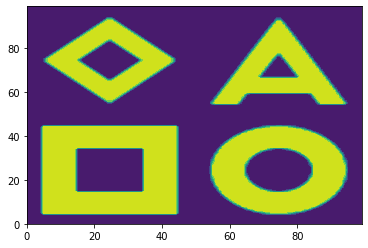

In [6]:
f=h5py.File('cube_adv/exec/init/output.h5','r') # open hdf5 file
plt.contourf(np.transpose(np.array(f['phi']['init'][25,:,:])))

In [7]:
mlab.contour3d(np.array(f['phi']['init']))
f.close()

## Contours

In [8]:
f1=h5py.File('cube_adv/exec/PLIC/visual.h5','r') # open hdf5 file
f12=h5py.File('cube_adv/exec/ELVIRA/visual.h5','r') # open hdf5 file
f2=h5py.File('cube_adv/exec/MOFZY/visual.h5','r') # open hdf5 file
f3=h5py.File('cube_adv/exec/THINC/visual.h5','r') # open hdf5 file
f21=h5py.File('cube_adv/exec/MOFSussman/visual.h5','r') # open hdf5 file
f22=h5py.File('cube_adv/exec/MOFBFGS/visual.h5','r') # open hdf5 file
f23=h5py.File('cube_adv/exec/MOFLemoineGN/visual.h5','r') # open hdf5 file

In [9]:
PLIC = np.array(f1['visual']['vis02'])
ELVIRA = np.array(f12['visual']['vis02'])
MOF  = np.array(f2['visual']['vis02'])
THINC = np.array(f3['visual']['vis02'])
Sussman = np.array(f21['visual']['vis02'])
BFGS = np.array(f22['visual']['vis02'])
GN = np.array(f23['visual']['vis02'])

### MOF ZY

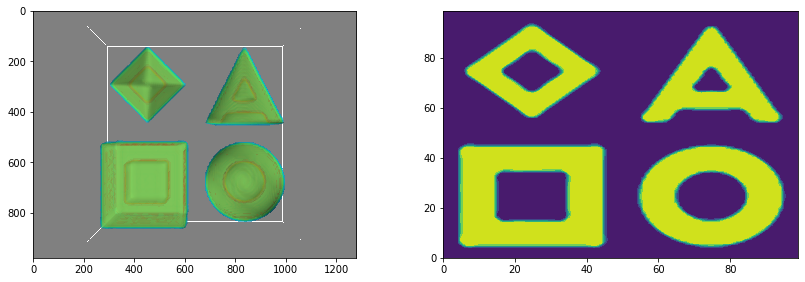

In [10]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('cube_adv/exec/MOFZY/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(MOF[24,:,:]))

### VOF-PLIC (MYCS)

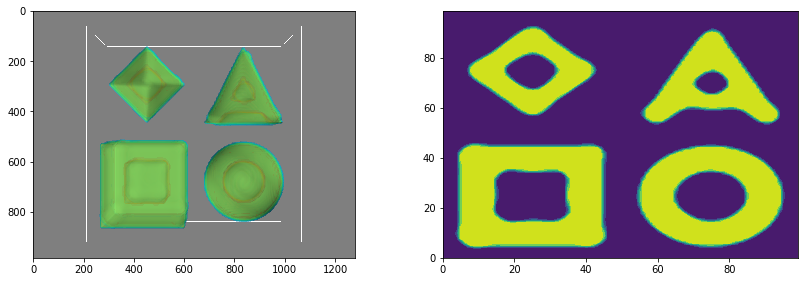

In [11]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('cube_adv/exec/PLIC/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(PLIC[24,:,:]))

### VOF-PLIC (ELVIRA)

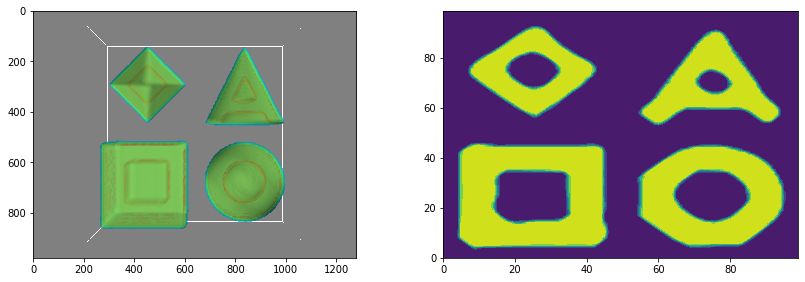

In [12]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('cube_adv/exec/ELVIRA/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(ELVIRA[24,:,:]))

### THINC-SW

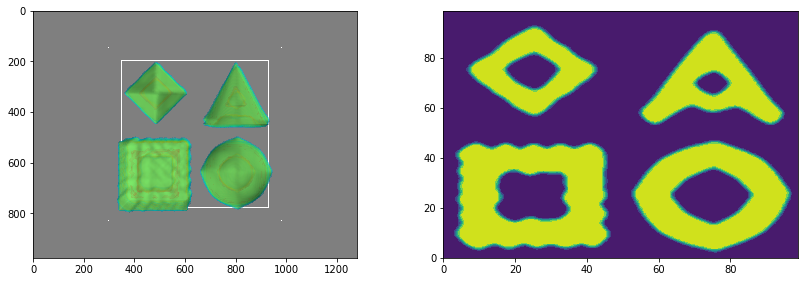

In [13]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('cube_adv/exec/THINC/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(THINC[24,:,:]))

### MOF-Sussman

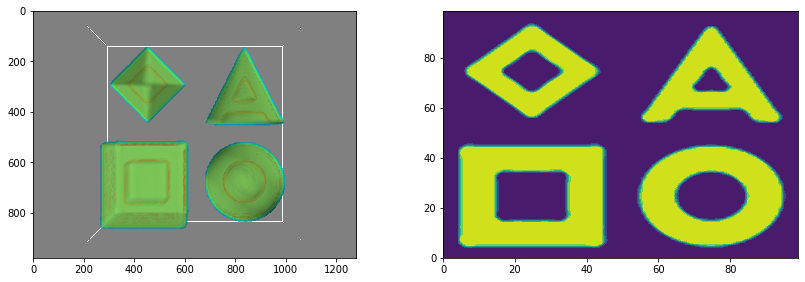

In [14]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('cube_adv/exec/MOFSussman/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(Sussman[24,:,:]))

### Lemoine-BFGS

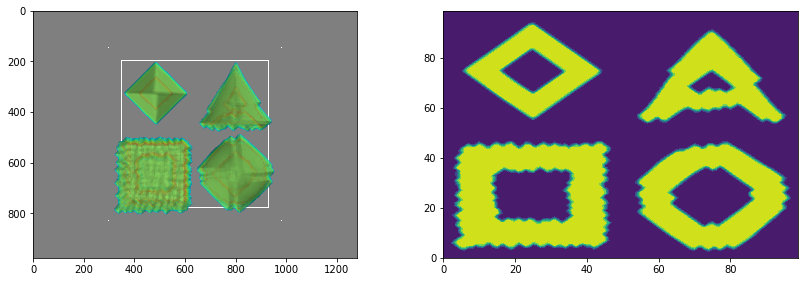

In [15]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('cube_adv/exec/MOFBFGS/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(BFGS[24,:,:]))

### Lemoine-GN

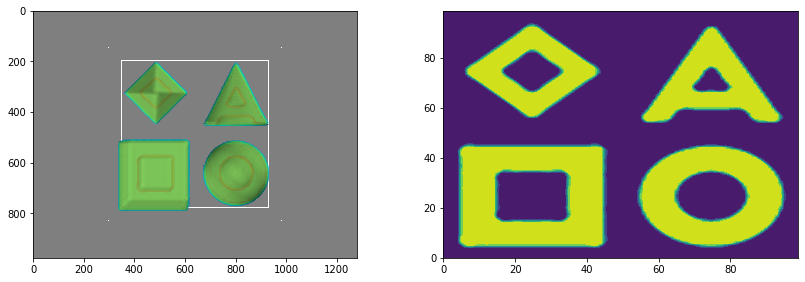

In [16]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('cube_adv/exec/MOFLemoineGN/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(GN[24,:,:]))

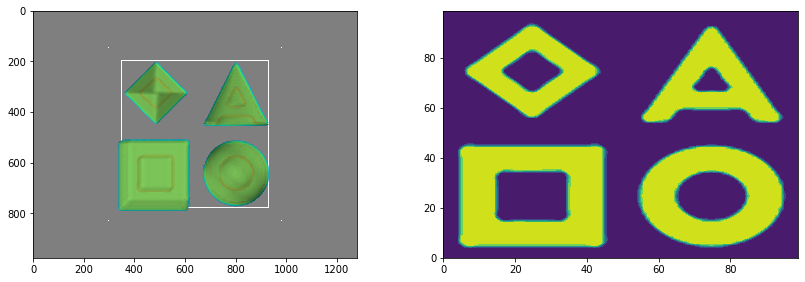

In [17]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('cube_adv/exec/MOFLemoineGN/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(MOF[24,:,:]))

## compare

In [18]:
case_path = ['cube_adv/exec/PLIC',
        'cube_adv/exec/ELVIRA',
        'cube_adv/exec/MOFZY',
        'cube_adv/exec/THINC',
        'cube_adv/exec/MOFSussman',
        'cube_adv/exec/MOFBFGS',
        'cube_adv/exec/MOFLemoineGN'
       ]

In [19]:
dics = {}
for p in case_path:
    casename = p.split('/')[-1]
    dics.update({casename:{}})
    file = open(p+'/errors.dat')
    for line in file:
        if 'cpu' in line:
            cpu_time = float(line.split('=')[-1])
            dics[casename].update({'cpu_time':cpu_time}) 
        if 'realtive' in line:
            err_r = float(line.split('=')[-1])
            dics[casename].update({'relative_error':err_r}) 
        if 'abso' in line:
            err_g = float(line.split('=')[-1])
            dics[casename].update({'geometry_error':err_g}) 
        if 'conse' in line:
            err_m = float(line.split('=')[-1])
            dics[casename].update({'mass_error':err_m}) 
           
    file.close()

In [20]:
pd.DataFrame.from_dict(dics)

,PLIC,ELVIRA,MOFZY,THINC,MOFSussman,MOFBFGS,MOFLemoineGN
cpu_time,10.428500,3274.376609,155.022748,42.178915,3327.660985,499.884233,71.466775
relative_error,0.084383,0.104092,0.058164,0.131324,0.058165,0.136759,0.058201
geometry_error,0.018469,0.022783,0.012731,0.028743,0.012731,0.029933,0.012739
mass_error,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Robustness of LemoineGN

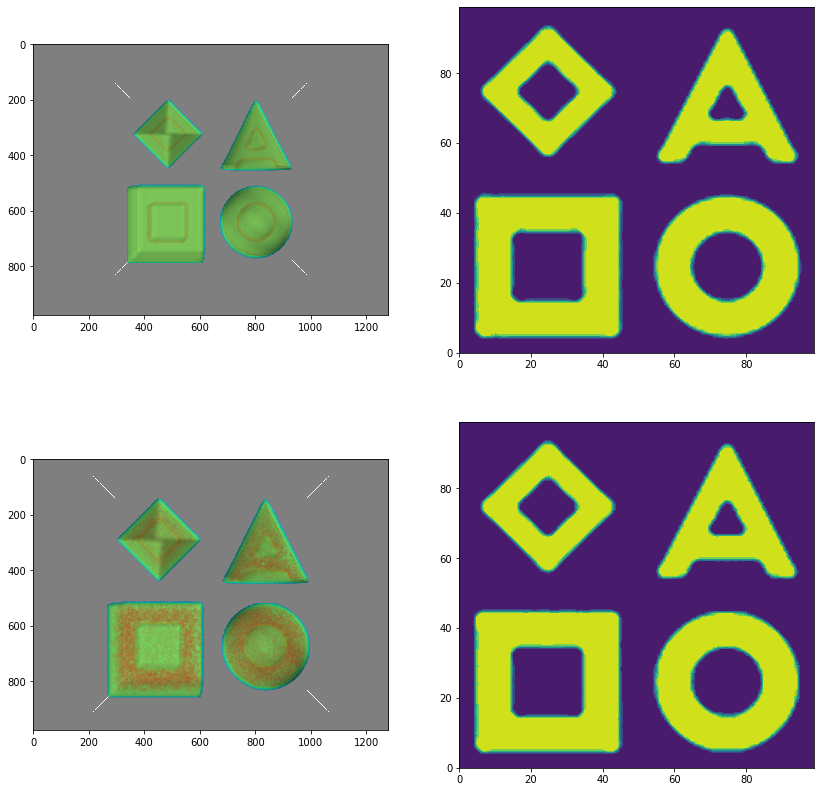

In [21]:
f1=h5py.File('cube_adv/exec/DIFF_LemoineGN/original/visual.h5','r') # open hdf5 file
f2=h5py.File('cube_adv/exec/DIFF_LemoineGN/Unstrained/visual.h5','r') # open hdf5 file
GN1 = np.array(f1['visual']['vis02'])
GN2 = np.array(f2['visual']['vis02'])
plt.figure(figsize=[14,14])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('cube_adv/exec/DIFF_LemoineGN/original/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(GN1[24,:,:]))
ax1 = plt.subplot(223)
ax1.imshow(mpimg.imread('cube_adv/exec/DIFF_LemoineGN/Unstrained/snapshot.png'))
ax2 = plt.subplot(224)
ax2.contourf(np.transpose(GN2[24,:,:]))

In [22]:
case_path = ['cube_adv/exec/DIFF_LemoineGN/original',
        'cube_adv/exec/DIFF_LemoineGN/Unstrained'
       ]

In [23]:
dics = {}
for p in case_path:
    casename = p.split('/')[-1]
    dics.update({casename:{}})
    file = open(p+'/errors.dat')
    for line in file:
        if 'cpu' in line:
            cpu_time = float(line.split('=')[-1])
            dics[casename].update({'cpu_time':cpu_time}) 
        if 'realtive' in line:
            err_r = float(line.split('=')[-1])
            dics[casename].update({'relative_error':err_r}) 
        if 'abso' in line:
            err_g = float(line.split('=')[-1])
            dics[casename].update({'geometry_error':err_g}) 
        if 'conse' in line:
            err_m = float(line.split('=')[-1])
            dics[casename].update({'mass_error':err_m}) 
           
    file.close()

In [24]:
pd.DataFrame.from_dict(dics)

,original,Unstrained
cpu_time,71.466775,531.474870
relative_error,0.058201,0.051705
geometry_error,0.012739,0.011317
mass_error,0.000000,0.000000


# Zalesak

In [34]:
f1=h5py.File('Zalesak/exec/50/PLIC/visual.h5','r') # open hdf5 file
f12=h5py.File('Zalesak/exec/50/ELVIRA/visual.h5','r') # open hdf5 file
f2=h5py.File('Zalesak/exec/50/MOFZY/visual.h5','r') # open hdf5 file
f3=h5py.File('Zalesak/exec/50/THINC/visual.h5','r') # open hdf5 file
# f21=h5py.File('cube_adv/exec/MOFSussman/visual.h5','r') # open hdf5 file
# f22=h5py.File('cube_adv/exec/MOFBFGS/visual.h5','r') # open hdf5 file
# f23=h5py.File('cube_adv/exec/MOFLemoineGN/visual.h5','r') # open hdf5 file

In [42]:
PLIC = np.array(f1['visual']['vis01'])
ELVIRA = np.array(f12['visual']['vis01'])
MOF  = np.array(f2['visual']['vis01'])
THINC = np.array(f3['visual']['vis01'])
# Sussman = np.array(f21['visual']['vis02'])
# BFGS = np.array(f22['visual']['vis02'])
# GN = np.array(f23['visual']['vis02'])

## MOFZY-50

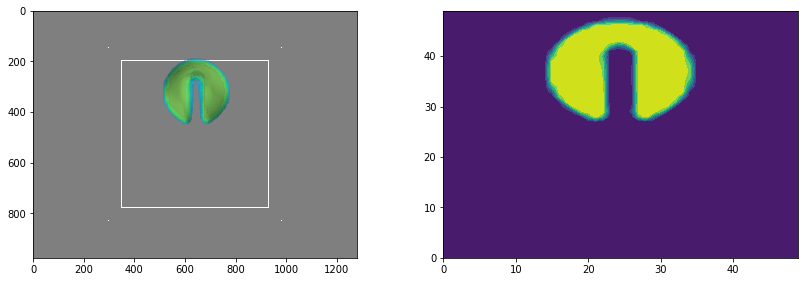

In [36]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('Zalesak/exec/50/MOFZY/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(MOF[12,:,:]))

## PLIC(MYCS)-50

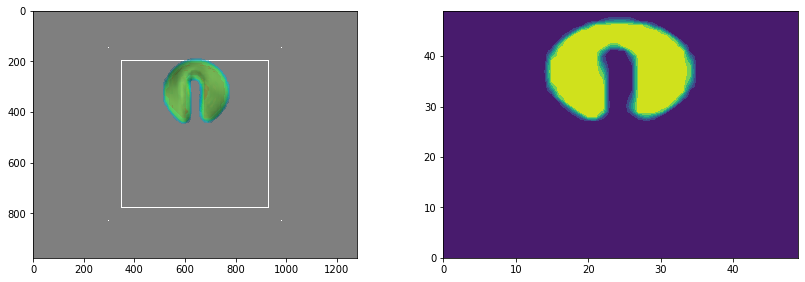

In [41]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('Zalesak/exec/50/PLIC/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(PLIC[12,:,:]))

## THINC-SW-50

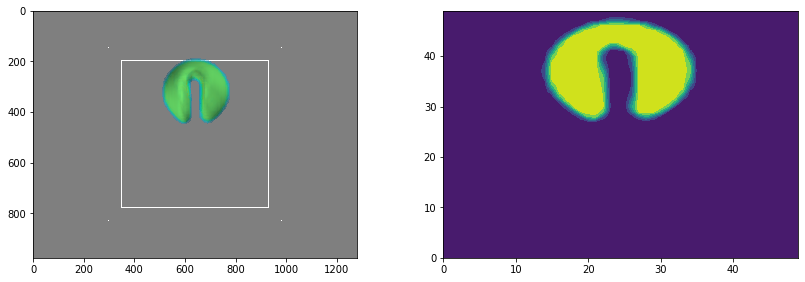

In [40]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('Zalesak/exec/50/THINC/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(THINC[12,:,:]))

## ELVIRA-50

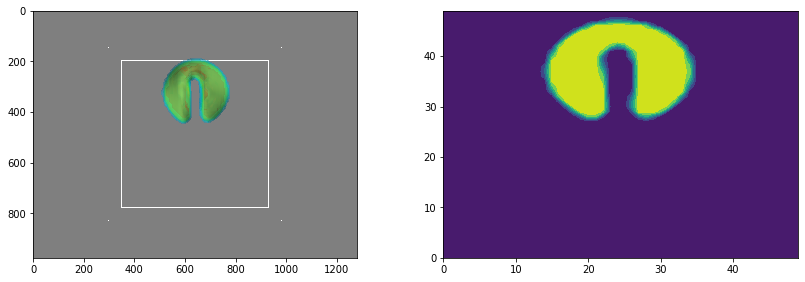

In [44]:
plt.figure(figsize=[14,10])
ax1 = plt.subplot(221)
ax1.imshow(mpimg.imread('Zalesak/exec/50/ELVIRA/snapshot.png'))
ax2 = plt.subplot(222)
ax2.contourf(np.transpose(ELVIRA[12,:,:]))